In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from sys import stdout
import matplotlib.pyplot as plt

**First let's load the dataset cleaned in "Scraping and cleaning" notebook**

In [148]:
df_app = pd.read_csv('data/final_dataset.csv', index_col=[0])
df_app.head(10)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,containsAds,released,updated,version,comments,icon,Ev_30_norm,Ev_60_norm,Score,Global_rank
0,/application/canva_graphic_design_video_invite...,1.0,"Canva: Graphic Design, Video, Invite & Logo Maker",2241579,50000000.0,4.68,4.7,8.8,Free,Art & Design,...,False,"Nov 27, 2017",1.587087e+09,2.57.2,"[{'userName': 'Alexis James', 'userImage': 'ht...",https://lh3.googleusercontent.com/homswqZDKEXx...,10535421.3,19725895.2,2.444906e+08,496.0
1,/application/ibis_paint_x/jp.ne.ibis.ibispaint...,2.0,ibis Paint X,642389,10000000.0,4.45,4.4,9.0,Free,Art & Design,...,True,"Feb 27, 2014",1.585644e+09,6.4.1,[],https://lh3.googleusercontent.com/QcfhlXm32JDn...,2826511.6,5781501.0,4.735863e+07,1669.0
2,/application/kappboom_cool_wallpapers_backgrou...,3.0,Kappboom - Cool Wallpapers & Background Wallpa...,399327,10000000.0,4.63,0.0,0.0,Free,Art & Design,...,True,"May 24, 2010",1.514876e+09,1.8.3,[],https://lh3.googleusercontent.com/7aIuxwpjZ9_S...,0.0,0.0,4.814888e+07,1480.0
3,/application/flipaclip_cartoon_animation/com.v...,4.0,FlipaClip: Cartoon animation,319841,10000000.0,4.28,1.5,3.2,Free,Art & Design,...,True,"Apr 2, 2012",1.581218e+09,2.4.6,[],https://lh3.googleusercontent.com/v1LHbiVKdHFs...,479761.5,1023491.2,4.416892e+07,2940.0
4,/application/u_launcher_lite_new_3d_launcher_2...,5.0,"U Launcher Lite-New 3D Launcher 2019, Hide apps",216161,10000000.0,4.52,1.6,3.4,Free,Art & Design,...,True,"Dec 12, 2017",1.586780e+09,2.2.24,[],https://lh3.googleusercontent.com/1-d8bEwvbj4c...,345857.6,734947.4,4.617705e+07,2045.0
5,/application/medibang_paint_make_art_/com.medi...,6.0,MediBang Paint - Make Art !,194262,10000000.0,4.10,1.2,2.5,Free,Art & Design,...,True,"Jun 16, 2015",1.583984e+09,18.4,[],https://lh3.googleusercontent.com/gJiINYcgwxuy...,233114.4,485655.0,4.179647e+07,4029.0
6,/application/u_launcher_3d_new_launcher_2019_3...,7.0,"U Launcher 3D: New Launcher 2019, 3d themes",130195,5000000.0,4.50,1.1,2.0,Free,Art & Design,...,True,"Apr 11, 2017",1.586074e+09,2.8.4,[],https://lh3.googleusercontent.com/bgXCQ7c3ahr0...,143214.5,260390.0,2.308588e+07,6198.0
7,/application/papercolor/com.eyewind.paperone,8.0,PaperColor,111058,10000000.0,4.23,1.9,4.2,Free,Art & Design,...,False,"Jun 17, 2016",1.544193e+09,2.3.6,[],https://lh3.googleusercontent.com/zk1SVbWvnYrH...,211010.2,466443.6,4.276978e+07,3598.0
8,/application/sand_draw_sketch_drawing_pad_crea...,9.0,Sand Draw Sketch Drawing Pad: Creative Doodle Art,99055,5000000.0,4.37,0.9,1.9,Free,Art & Design,...,True,"Mar 21, 2013",1.557643e+09,3.4.3,[],https://lh3.googleusercontent.com/FEtDcu77tw3X...,89149.5,188204.5,2.228287e+07,6787.0
9,/application/how_to_draw_graffitis/com.sweefit...,10.0,How to Draw Graffitis,94175,5000000.0,4.33,0.2,0.4,Free,Art & Design,...,True,"Feb 21, 2015",1.570780e+09,7.1.2,[],https://lh3.googleusercontent.com/Ax5kgE7e8TLP...,18835.0,37670.0,2.205778e+07,6978.0


**Now let's see the repartion of the free and paid app on the Google Play Store**

In [3]:
df_app["Price"].value_counts().head(10)

Free     22627
$4.99       22
$0.99       19
$2.99       16
$1.99       14
$3.99        8
$6.99        5
$5.99        4
$2.49        4
$9.99        4
Name: Price, dtype: int64

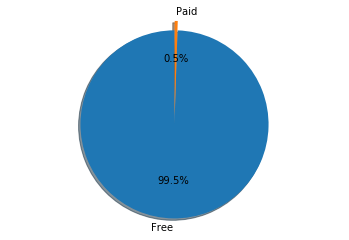

In [4]:
labels = 'Free', 'Paid'
explode = (0.1,0) #In order to highlights Free app

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[df_app["Price"]=="Free"])[0], np.shape(df_app[df_app["Price"]!="Free"])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Now let's see this distribution over all the categories**

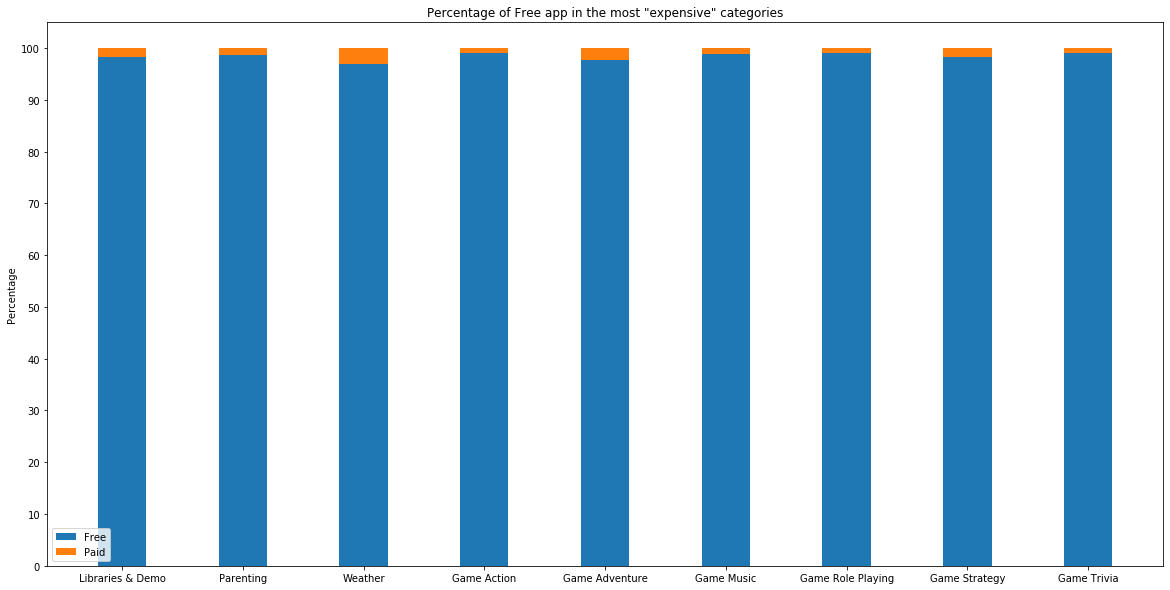

In [5]:
free = []
paid = []
label =[]
for category in df_app.Category.unique():
    free_cat = np.shape(df_app[(df_app["Price"]=="Free") & (df_app["Category"]== category)])[0]
    paid_cat = np.shape(df_app[(df_app["Price"]!="Free") & (df_app["Category"]== category)])[0]
    if((paid_cat/(free_cat+paid_cat))*100 >=1):
        label.append(category)
        free.append(free_cat/(free_cat+paid_cat)*100)
        paid.append((paid_cat/(free_cat+paid_cat))*100)
ind = np.arange(len(free))    
width = 0.4      
plt.figure(figsize=(20,10))
p1 = plt.bar(ind, free, width,)
p2 = plt.bar(ind, paid, width,
             bottom=free)

plt.ylabel("Percentage")
plt.title('Percentage of Free app in the most "expensive" categories')
plt.xticks(ind, label)
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0]), ('Free', 'Paid'))

plt.show()

In [7]:
df_app["Nb_Rating"].describe()

count    2.274600e+04
mean     2.003982e+05
std      1.634216e+06
min      1.000000e+02
25%      8.091000e+03
50%      3.220650e+04
75%      9.772125e+04
max      1.068849e+08
Name: Nb_Rating, dtype: float64

In [8]:
df_app["Installs"].describe()

count    2.274600e+04
mean     1.144295e+07
std      1.242483e+08
min      1.000000e+00
25%      1.000000e+06
50%      1.000000e+06
75%      5.000000e+06
max      5.000000e+09
Name: Installs, dtype: float64

In [9]:
df_app[df_app["Installs"]== df_app["Installs"].max()]

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,size,androidVersion,developer,developerId,containsAds,released,updated,version,comments,icon
2936,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication,...,27M,4.0.3,WhatsApp Inc.,WhatsApp+Inc.,False,"Oct 18, 2010",1.586970e+09,2.20.123,NaN,https://lh3.googleusercontent.com/bYtqbOcTYOlg...
2939,/application/google_chrome_fast_secure/com.and...,4.0,Google Chrome: Fast & Secure,19578408,5.000000e+09,4.37,2.9,5.6,Free,Communication,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"Feb 7, 2012",1.586974e+09,Varies with device,NaN,https://lh3.googleusercontent.com/KwUBNPbMTk9j...
2945,/application/gmail/com.google.android.gm,10.0,Gmail,6743557,5.000000e+09,4.40,1.7,2.9,Free,Communication,...,Varies with device,Varies,Google LLC,5700313618786177705,True,"Sep 21, 2010",1.587253e+09,Varies with device,NaN,https://lh3.googleusercontent.com/qTG9HMCp-s_a...
9141,/application/google_play_music/com.google.andr...,3.0,Google Play Music,4382860,5.000000e+09,4.10,1.1,1.9,Free,Music & Audio,...,Varies with device,Varies,Google LLC,5700313618786177705,True,"May 5, 2011",1.585677e+09,Varies with device,NaN,https://lh3.googleusercontent.com/HQm_x5ZH-Y61...
11595,/application/google_drive/com.google.android.a...,2.0,Google Drive,5081538,5.000000e+09,4.39,2.5,4.7,Free,Productivity,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"Apr 27, 2011",1.586790e+09,Varies with device,NaN,https://lh3.googleusercontent.com/1pw-tHjrkmMg...
12585,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social,...,Varies with device,Varies,Facebook,Facebook,True,NaN,1.587188e+09,Varies with device,NaN,https://lh3.googleusercontent.com/ccWDU4A7fX1R...
13562,/application/google_play_services/com.google.a...,1.0,Google Play services,28257988,5.000000e+09,4.26,1.6,3.5,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"May 24, 2012",1.587309e+09,Varies with device,NaN,https://lh3.googleusercontent.com/f6ZSUJrtL5un...
13564,/application/google/com.google.android.googleq...,3.0,Google,13997467,5.000000e+09,4.41,2.1,3.9,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,True,"Aug 12, 2010",1.587136e+09,Varies with device,NaN,https://lh3.googleusercontent.com/DKoidc0T3T1K...
13583,/application/android_accessibility_suite/com.g...,22.0,Android Accessibility Suite,1830589,5.000000e+09,4.36,2.2,3.4,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,False,NaN,1.586882e+09,Varies with device,NaN,https://lh3.googleusercontent.com/xBFTJQCPqUh0...
13586,/application/google_text_to_speech/com.google....,25.0,Google Text-to-Speech,1661524,5.000000e+09,4.35,2.3,3.5,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"Oct 10, 2013",1.587021e+09,Varies with device,NaN,https://lh3.googleusercontent.com/NqWvryDAnkEW...


In [10]:
df_app.sort_values(["Nb_Rating", "Installs"], ascending = False).head(10)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,size,androidVersion,developer,developerId,containsAds,released,updated,version,comments,icon
2936,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication,...,27M,4.0.3,WhatsApp Inc.,WhatsApp+Inc.,False,"Oct 18, 2010",1.586970e+09,2.20.123,NaN,https://lh3.googleusercontent.com/bYtqbOcTYOlg...
12585,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social,...,Varies with device,Varies,Facebook,Facebook,True,NaN,1.587188e+09,Varies with device,NaN,https://lh3.googleusercontent.com/ccWDU4A7fX1R...
12586,/application/instagram/com.instagram.android,2.0,Instagram,95806924,1.000000e+09,4.46,1.4,2.8,Free,Social,...,Varies with device,Varies,Instagram,Instagram,True,"Apr 3, 2012",1.586836e+09,Varies with device,NaN,https://lh3.googleusercontent.com/2sREY-8Upjma...
2937,/application/messenger_text_and_video_chat_for...,2.0,Messenger – Text and Video Chat for Free,71185969,1.000000e+09,4.24,0.5,1.1,Free,Communication,...,Varies with device,Varies,Facebook,Facebook,False,"Jan 30, 2014",1.586925e+09,Varies with device,NaN,https://lh3.googleusercontent.com/rkBi-WHAI-dz...
14543,/application/youtube/com.google.android.youtube,1.0,YouTube,67255190,5.000000e+09,4.14,2.2,4.0,Free,Video Players,...,Varies with device,Varies,Google LLC,5700313618786177705,True,"Oct 20, 2010",1.587170e+09,Varies with device,NaN,https://lh3.googleusercontent.com/lMoItBgdPPVD...
21281,/application/clash_of_clans/com.supercell.clas...,1.0,Clash of Clans,51568217,5.000000e+08,4.51,0.3,0.7,Free,Game Strategy,...,143M,4.1,Supercell,6715068722362591614,False,"Sep 30, 2013",1.586947e+09,13.180.13,NaN,https://lh3.googleusercontent.com/akv2Bdp7i5Vv...
15511,/application/garena_free_fire_kalahari/com.dts...,1.0,Garena Free Fire: Kalahari,43395207,5.000000e+08,4.36,5.5,8.4,Free,Game Action,...,41M,4.0.3,GARENA INTERNATIONAL I PRIVATE LIMITED,GARENA+INTERNATIONAL+I+PRIVATE+LIMITED,False,"Dec 7, 2017",1.585912e+09,1.47.0,NaN,https://lh3.googleusercontent.com/LJxdq84-4j_f...
16497,/application/subway_surfers/com.kiloo.subwaysurf,1.0,Subway Surfers,32200740,1.000000e+09,4.47,0.6,1.3,Free,Game Arcade,...,94M,4.1,SYBO Games,7363891306616760846,True,"Sep 20, 2012",1.587028e+09,1.118.0,NaN,https://lh3.googleusercontent.com/qW2OiztjJl0V...
13562,/application/google_play_services/com.google.a...,1.0,Google Play services,28257988,5.000000e+09,4.26,1.6,3.5,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"May 24, 2012",1.587309e+09,Varies with device,NaN,https://lh3.googleusercontent.com/f6ZSUJrtL5un...
21282,/application/clash_royale/com.supercell.clashr...,2.0,Clash Royale,28254261,1.000000e+08,4.26,0.5,1.0,Free,Game Strategy,...,106M,4.1,Supercell,6715068722362591614,False,"Mar 1, 2016",1.574956e+09,3.2.1,NaN,https://lh3.googleusercontent.com/K-MNjDiO2WwR...


In [11]:
df_app["Ev_30_norm"] = df_app["Ev_30"]*df_app["Nb_Rating"]
df_app["Ev_60_norm"] = df_app["Ev_60"]*df_app["Nb_Rating"]

In [12]:
df_app.Category.unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Maps & Navigation', 'Medical', 'Music & Audio',
       'News & Magazines', 'Parenting', 'Personalization', 'Photography',
       'Productivity', 'Shopping', 'Social', 'Sports', 'Tools',
       'Travel & Local', 'Video Players', 'Weather', 'Game Action',
       'Game Adventure', 'Game Arcade', 'Game Board', 'Game Casino',
       'Game Casual', 'Game Educational', 'Game Music', 'Game Puzzle',
       'Game Racing', 'Game Role Playing', 'Game Simulation',
       'Game Sports', 'Game Strategy', 'Game Trivia', 'Game Word'],
      dtype=object)

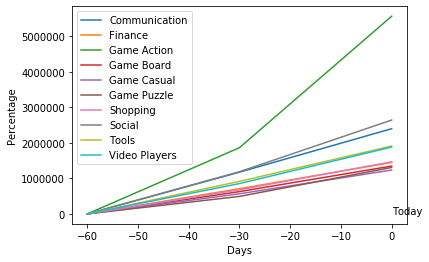

In [13]:
grouped = df_app.groupby("Category")["Ev_30_norm","Ev_60_norm"].mean()

for index in grouped[grouped["Ev_60_norm"] > 1200000].index:
    x = [-60,-30,0]
    y = [0,grouped.loc[index,"Ev_30_norm"],grouped.loc[index,"Ev_60_norm"]]
    plt.plot(x, y, label = index)
plt.annotate("Today",(0,0))
plt.xlabel('Days')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# Ranking
**In this section we will try to made a simple but reliable score to make global ranking**

In [149]:
df_app.columns

Index(['URL', 'Rank', 'Name', 'Nb_Rating', 'Installs', 'Avg_Rating', 'Ev_30',
       'Ev_60', 'Price', 'Category', 'Parsable', 'histogram', 'size',
       'androidVersion', 'developer', 'developerId', 'containsAds', 'released',
       'updated', 'version', 'comments', 'icon', 'Ev_30_norm', 'Ev_60_norm',
       'Score', 'Global_rank'],
      dtype='object')

In [150]:
from math import log10
test = df_app[["URL","Name","icon", "Category" ,"containsAds",\
               "Price","developer", "Nb_Rating", "Installs", "Avg_Rating" ]].copy()
test["log_Install"] = test["Installs"].apply(lambda x: log10(x))

**We create the dataframe use for the barplot in the facebook app: (score depending on alpha).**

In [153]:
for alpha in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    test[str(alpha)] = (alpha*(test["log_Install"]-test["log_Install"].min())/(test["log_Install"].max()-\
                        test["log_Install"].min())+(1-alpha)*(test["Nb_Rating"]-test["Nb_Rating"].min())/\
                        (test["Nb_Rating"].max()-test["Nb_Rating"].min()))*df_app["Avg_Rating"]
    test[str(alpha)]=((test[str(alpha)]-test[str(alpha)].min())/(test[str(alpha)].max()-test[str(alpha)].min()))
test.to_csv("data/facebook_barplot.csv", index=False)

**The best score is given by alpha = 0.5**

In [155]:
test["Global_rank"] = test["0.5"].rank(ascending = False)
test_500 = test.sort_values(["Global_rank"])[:500].copy()

In [157]:
category = test_500.Category.unique()[0]

**Category have a len of 38: ALL category are not in the top 500**

In [158]:
test_500.drop(columns =["log_Install", "0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1"], inplace=True)
test_500

,URL,Name,icon,Category,containsAds,Price,developer,Nb_Rating,Installs,Avg_Rating,Global_rank
2936,/application/whatsapp_messenger/com.whatsapp,WhatsApp Messenger,https://lh3.googleusercontent.com/bYtqbOcTYOlg...,Communication,False,Free,WhatsApp Inc.,106884902,5.000000e+09,4.29,1.0
12586,/application/instagram/com.instagram.android,Instagram,https://lh3.googleusercontent.com/2sREY-8Upjma...,Social,True,Free,Instagram,95806924,1.000000e+09,4.46,2.0
12585,/application/facebook/com.facebook.katana,Facebook,https://lh3.googleusercontent.com/ccWDU4A7fX1R...,Social,True,Free,Facebook,96409662,5.000000e+09,4.24,3.0
2937,/application/messenger_text_and_video_chat_for...,Messenger – Text and Video Chat for Free,https://lh3.googleusercontent.com/rkBi-WHAI-dz...,Communication,False,Free,Facebook,71185969,1.000000e+09,4.24,4.0
14543,/application/youtube/com.google.android.youtube,YouTube,https://lh3.googleusercontent.com/lMoItBgdPPVD...,Video Players,True,Free,Google LLC,67255190,5.000000e+09,4.14,5.0
21281,/application/clash_of_clans/com.supercell.clas...,Clash of Clans,https://lh3.googleusercontent.com/akv2Bdp7i5Vv...,Game Strategy,False,Free,Supercell,51568217,5.000000e+08,4.51,6.0
15511,/application/garena_free_fire_kalahari/com.dts...,Garena Free Fire: Kalahari,https://lh3.googleusercontent.com/LJxdq84-4j_f...,Game Action,False,Free,GARENA INTERNATIONAL I PRIVATE LIMITED,43395207,5.000000e+08,4.36,7.0
16497,/application/subway_surfers/com.kiloo.subwaysurf,Subway Surfers,https://lh3.googleusercontent.com/qW2OiztjJl0V...,Game Arcade,True,Free,SYBO Games,32200740,1.000000e+09,4.47,8.0
13562,/application/google_play_services/com.google.a...,Google Play services,https://lh3.googleusercontent.com/f6ZSUJrtL5un...,Tools,False,Free,Google LLC,28257988,5.000000e+09,4.26,9.0
17330,/application/candy_crush_saga/com.king.candycr...,Candy Crush Saga,https://lh3.googleusercontent.com/yFQN_JmP4ks7...,Game Casual,True,Free,King,27770636,5.000000e+08,4.63,10.0


**We create the dataframe for the last plot**

In [23]:
test_500.to_csv("data/parallel.csv", sep=",", index=False)

**We create the json for the treemap**

In [65]:
import json

data = {}
data['name'] = "Top500"
data['shortName'] = "Top500"
data['children'] = []
for category in test_500.Category.unique():
    data['children'].append({
        'name': category,
        'shortName': category,
        'children': []
    })
    for url in test_500.loc[test_500["Category"]==category, "URL"]:
        list(filter(lambda x: x["name"] == category, data["children"]))[0]["children"].append({
            'name': emoji_pattern.sub(r'', test_500.loc[test_500["URL"]==url, "Name"].values[0]),
            'shortName': emoji_pattern.sub(r'', test_500.loc[test_500["URL"]==url, "Name"].values[0]),
            "size": test_500.loc[test_500["URL"]==url, "0.5"].values[0]
        })
with open('data/treemap.txt', 'w') as outfile:
    json.dump(data, outfile)

**Thanks to an API on the same website we can also get more detailled information but it is limited to 100 requests per hour**

**These cells will be explored later to get more information for the best ranked app in the overall ranking**

In [16]:
def call_api(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception('API response: {}'.format(response.status_code))
    return response

In [17]:
#################### HERE we will need to define which app need more information
website = "https://www.androidrank.org/api/application/"
key = "60lnc52x178li1rocmpum3829kdf6d9wt3dp7lqg7vxmqat6ov9ekcoipmqyuzpa"

for url in df_app.sort_values(["Global_rank"])["URL"].head(500):
    codename = url.split('/')[-1]
    search = website+codename+"?key="+key;
    response = call_api(search)
    bigjson.append(response.json())

NameError: name 'bigjson' is not defined

In [19]:
len(bigjson)

500

In [ ]:
# Now we have more detailled informations about the top 500 apps
import json
with open('data/bigjson.txt', 'w') as outfile:
    json.dump(bigjson, outfile)

In [ ]:
################## Exemple on how to navigate in the big dictionnary
test = list(filter(lambda person: person['category'] == 'Communication', bigjson))

In [161]:
test_500["comments"] = ""
test_500['comments'] = test_500['comments'].astype('object')

**Let's scrape the 500 most relevant comment for the 500 top apps**

In [166]:
from google_play_scraper import Sort, reviews
i = 269
tot_page = 500
for url in test_500["URL"][i:]:
    continuation_token = None
    i += 1
    printed= i/tot_page*100
    stdout.write("\r%f %%" % printed)
    stdout.flush()
    codename = url.split('/')[-1]
    resultfinal = []
    for j in range(5):
        result, continuation_token = reviews(
            codename,
            lang='en', # defaults to 'en'
            country='us', # defaults to 'us'
            sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
            count=100, # defaults to 100
            continuation_token=continuation_token
        )
        resultfinal = resultfinal + result
    test_500.at[df_app.index[df_app["URL"]==url].tolist()[0],"comments"] = resultfinal

100.000000 %

In [172]:
import pickle
test_500.to_pickle("data/test_comments.txt")

**DEVELOPERS**

**In this section we are making all the dataframe to make the EPFL graphs**

In [32]:
test_500.groupby("developer")["Name"].count().sort_values(ascending=False)[:62].to_csv("list.csv", sep=",")

/Users/antoineschmider/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [56]:
df_app.groupby("developer")["Nb_Rating"].mean().sort_values(ascending=False).head(50)

developer
WhatsApp Inc.                             3.726692e+07
Instagram                                 2.448745e+07
GARENA INTERNATIONAL I PRIVATE LIMITED    2.178652e+07
Snap Inc                                  2.145865e+07
Supercell                                 1.777575e+07
TikTok Inc.                               1.728676e+07
Facebook                                  1.692612e+07
Safe Security Develop                     1.682958e+07
SYBO Games                                1.620498e+07
Viber Media S.à r.l.                      1.357553e+07
SHAREit Technologies Co.Ltd               1.341056e+07
BBM .                                     1.298689e+07
True Software Scandinavia AB              1.218324e+07
Roblox Corporation                        1.193458e+07
Zakeh                                     1.104251e+07
Skype                                     1.096306e+07
Duolingo                                  8.796081e+06
Moonton                                   8.786584e+06


In [61]:
df_app.groupby("developer")["Installs"].mean().sort_values(ascending=False).head(50)

developer
WhatsApp Inc.                             1.733333e+09
SHAREit Technologies Co.Ltd               1.000000e+09
Skype                                     1.000000e+09
Snap Inc                                  1.000000e+09
Google LLC                                7.194388e+08
Facebook                                  6.937273e+08
ANT+                                      6.668333e+08
SYBO Games                                5.025000e+08
Flipboard                                 5.000000e+08
True Software Scandinavia AB              5.000000e+08
Zakeh                                     5.000000e+08
Dropbox, Inc.                             5.000000e+08
Viber Media S.à r.l.                      5.000000e+08
TikTok Inc.                               5.000000e+08
Samsung Electronics Co.,  Ltd.            4.189688e+08
HP Inc.                                   3.050000e+08
Instagram                                 3.002500e+08
Fingersoft                                3.000000e+08


In [62]:
df_app.groupby("developer")["Score"].mean().sort_values(ascending=False).head(50)

developer
WhatsApp Inc.                             7.590385e+09
Snap Inc                                  4.453560e+09
SHAREit Technologies Co.Ltd               4.367800e+09
Skype                                     4.347141e+09
Google LLC                                3.109619e+09
Facebook                                  3.011601e+09
ANT+                                      2.671266e+09
TikTok Inc.                               2.353655e+09
True Software Scandinavia AB              2.325312e+09
SYBO Games                                2.318846e+09
Viber Media S.à r.l.                      2.234054e+09
Zakeh                                     2.233256e+09
Dropbox, Inc.                             2.133475e+09
Flipboard                                 2.091381e+09
Samsung Electronics Co.,  Ltd.            1.838242e+09
Instagram                                 1.449971e+09
Fingersoft                                1.356322e+09
HP Inc.                                   1.321928e+09


## ADS & PAID

**We make json for both bubble charts**

In [ ]:
import json

data = {}
data['name'] = "Root"
data['children'] = []
for category in df_app.Category.unique():
    data['children'].append({
        'name': category,
        "size": np.shape(df_app[(df_app["containsAds"]==True) & (df_app["Category"]==category)])[0]/np.shape(df_app[(df_app["Category"]==category)])[0]
    })
with open('data/bubbleAds.txt', 'w') as outfile:
    json.dump(data, outfile)

In [11]:
import json

data = {}
data['name'] = "Root"
data['children'] = []
for category in df_app.Category.unique():
    data['children'].append({
        'name': category,
        "size": np.shape(df_app[(df_app["Price"]!="Free") & (df_app["Category"]==category)])[0]/np.shape(df_app[(df_app["Category"]==category)])[0]
    })
with open('data/bubblePaid.txt', 'w') as outfile:
    json.dump(data, outfile)

In [33]:
import json

data = {}
data['name'] = "Root"
data['children'] = []
data['children'].append({
    'name': "Paid",
    "size": np.shape(df_app[(df_app["Price"]!="Free")])[0],
    'children': []
})
for category in df_app.Category.unique():
    list(filter(lambda prout: prout["name"] == "Paid", data["children"]))[0]["children"].append({
        'name': category,
        "size": np.shape(df_app[((df_app["Category"] == category) & (df_app["Price"]!="Free"))])[0]
    })
data['children'].append({
    'name': "Free",
    "size": np.shape(df_app[(df_app["Price"]=="Free")])[0],
    "children":[]
})
for category in df_app.Category.unique():
    list(filter(lambda prout: prout["name"] == "Free", data["children"]))[0]["children"].append({
        'name': category,
        "size": np.shape(df_app[((df_app["Category"] == category) & (df_app["Price"]=="Free"))])[0]
    })
with open('data/bubbleAdsperPaid.txt', 'w') as outfile:
    json.dump(data, outfile)


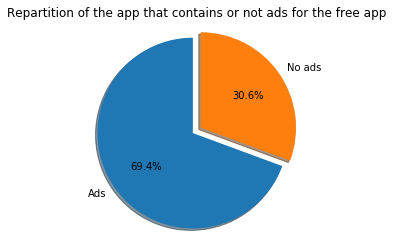

In [64]:
labels = 'Ads', 'No ads'
explode = (0.1,0) #In order to highlights Free app

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[(df_app["containsAds"]==True) & (df_app["Price"]=="Free")])[0], np.shape(df_app[(df_app["containsAds"]==False) & (df_app["Price"]=="Free")])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Repartition of the app that contains or not ads for the free app")
plt.show()

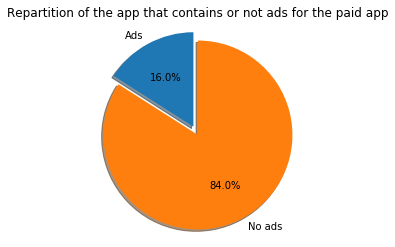

In [65]:
labels = 'Ads', 'No ads'
explode = (0.1,0) #In order to highlights Free app

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[(df_app["containsAds"]==True) & (df_app["Price"]!="Free")])[0], np.shape(df_app[(df_app["containsAds"]==False) & (df_app["Price"]!="Free")])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Repartition of the app that contains or not ads for the paid app")
plt.show()

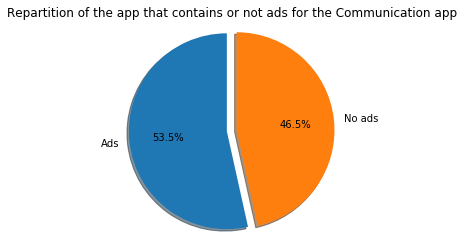

In [71]:
### PER Category
labels = 'Ads', 'No ads'
explode = (0.1,0) #In order to highlights Free app
category = "Communication"

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[(df_app["containsAds"]==True) & (df_app["Category"]==category)])[0], 
        np.shape(df_app[(df_app["containsAds"]==False) & (df_app["Category"]==category)])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Repartition of the app that contains or not ads for the " + category +" app")
plt.show()

In [5]:
df_containsAds = pd.DataFrame(columns=["Category","Ads_or_not", "Count"])
for category in df_app.Category.unique():
    df_containsAds = df_containsAds.append({"Category": category, "Ads_or_not": "Ads", "Count": np.shape(df_app[(df_app["containsAds"]==True) & (df_app["Category"]==category)])[0]}, ignore_index=True)
    df_containsAds = df_containsAds.append({"Category": category, "Ads_or_not": "No_Ads", "Count": np.shape(df_app[(df_app["containsAds"]==False) & (df_app["Category"]==category)])[0]}, ignore_index=True)
    

In [6]:
df_containsAds

,Category,Ads_or_not,Count
0,Art & Design,Ads,439
1,Art & Design,No_Ads,49
2,Auto & Vehicles,Ads,346
3,Auto & Vehicles,No_Ads,151
4,Beauty,Ads,393
5,Beauty,No_Ads,86
6,Books & Reference,Ads,348
7,Books & Reference,No_Ads,145
8,Business,Ads,143
9,Business,No_Ads,353


In [7]:
df_containsAds.to_csv("containsAds.tsv", index=False)

**We still have 16% of paid app that have ads**

In [72]:
df_app_500 = df_app.sort_values(["Global_rank"]).head(500).copy()
df_app_500.reset_index(inplace=True, drop = True)

**We will deal with the comment to remove punctuation and stopwords and then apply a counter to make a wordchart in twitter**

In [215]:
# Text handling utilities
from string import punctuation
stopwords_list = open('data/stopwords.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])

In [180]:
test_500.reset_index(drop = True, inplace=True)

In [182]:
test_500["Comment_tot_cleaned"]= ""
test_500["Comment_tot_cleaned"] = test_500["Comment_tot_cleaned"].astype(object)

In [216]:
for index in test_500.index:
    comment_cleaned=""
    for comment in range(0, len(test_500.loc[index]['comments'])):
        if test_500.loc[index]['comments'][comment]['content']:
            comment_cleaned = comment_cleaned + stopword_remover(lowercase_all(remove_punct(test_500.loc[index]['comments'][comment]['content'])))
    test_500.at[index,"Comment_tot_cleaned"] = comment_cleaned.split()

**Count the number of reply to plot it in epfl app later**

In [ ]:
for index in test_500.index:
    nb_reply=0
    for comment in range(0, len(test_500.loc[index]['comments'])):
        if test_500.loc[index]['comments'][comment]['replyContent']:
            nb_reply +=1
    test_500.loc[index,"Comment_reply"] = nb_reply

In [143]:
test_500.to_pickle("data/df_500_good_score.txt")

In [146]:
from collections import Counter
c = Counter(df_app_500.loc[3, "Comment_tot_cleaned"])
c.most_common(20)

[('chrome', 359),
 ('app', 268),
 ('update', 260),
 ('browser', 199),
 ('google', 196),
 ('phone', 130),
 ('please', 129),
 ('screen', 128),
 ('its', 127),
 ('use', 116),
 ('fix', 114),
 ('problem', 104),
 ('open', 101),
 ('even', 98),
 ('page', 95),
 ('time', 93),
 ('im', 92),
 ('like', 90),
 ('working', 89),
 ('cant', 86)]

In [307]:
from collections import Counter
words = (list(list([a for b in test_500.Comment_tot_cleaned.tolist() for a in b])))
len(Counter(words))
most_commons = Counter(words).most_common(150)

265831

In [210]:
def get_list_of_dict(keys, list_of_tuples):
    list_of_dict = [dict(zip(keys, values)) for values in list_of_tuples]
    return list_of_dict

In [309]:
dict_best = get_list_of_dict(["word", "size"], most_commons)

In [310]:
dict_best

[{'word': 'app', 'size': 102430},
 {'word': 'game', 'size': 82302},
 {'word': 'like', 'size': 38748},
 {'word': 'good', 'size': 30970},
 {'word': 'time', 'size': 29138},
 {'word': 'use', 'size': 26186},
 {'word': 'play', 'size': 24400},
 {'word': 'one', 'size': 23611},
 {'word': 'really', 'size': 21260},
 {'word': 'please', 'size': 20806},
 {'word': 'even', 'size': 20440},
 {'word': 'phone', 'size': 20311},
 {'word': 'love', 'size': 19643},
 {'word': 'great', 'size': 18870},
 {'word': 'update', 'size': 18617},
 {'word': 'ads', 'size': 16630},
 {'word': 'much', 'size': 16093},
 {'word': 'many', 'size': 15926},
 {'word': 'new', 'size': 15080},
 {'word': 'want', 'size': 13744},
 {'word': 'still', 'size': 13668},
 {'word': 'fun', 'size': 13241},
 {'word': 'easy', 'size': 13194},
 {'word': 'problem', 'size': 12763},
 {'word': 'need', 'size': 12718},
 {'word': 'fix', 'size': 12512},
 {'word': 'work', 'size': 11741},
 {'word': 'best', 'size': 11677},
 {'word': 'way', 'size': 11502},
 {'word':

In [236]:
most_commons_dict = dict((x, y) for x, y in most_commons)
most_commons_dict['app']

102430

In [274]:
grouped = test_500.groupby('Category').agg({'Comment_tot_cleaned': 'sum'})
grouped["counter"] = ""
grouped["counter"] = grouped["counter"].astype(object)
for category in test_500.Category.unique():
    words = grouped.loc[category, "Comment_tot_cleaned"]
    grouped.at[category,"counter"] = dict((x, y) for x, y in Counter(words).most_common(500))

In [312]:
category_usage = pd.DataFrame(index=list(most_commons_dict.keys()) , columns=grouped.index.unique())
for keys in most_commons_dict:
    for category in grouped.index.unique():
        if(keys in grouped.loc[category, "counter"]):
            category_usage.loc[keys, category] =  grouped.loc[category, "counter"][keys]/most_commons_dict[keys]*100
        else:
            category_usage.loc[keys, category] = 0

In [313]:
category_usage.to_csv("data/category_usage.csv")

In [314]:
category_usage_filtered = category_usage.copy()
category_usage_filtered[category_usage_filtered<1]=0

In [315]:
category_usage_filtered.to_csv("data/category_usage_filtered.csv")

In [289]:
list_word =[]
for word in category_usage_filtered.columns:
    list_word.append(category_usage_filtered[word].to_dict())

In [303]:
category_usage_filtered.to_csv("data/twitter_stacked.csv")

In [297]:
import csv
with open("data/word_chart.csv", 'w') as f:
    f.write("%s,%s\n"%("word","size"))
    for key in most_commons_dict.keys():
        f.write("%s,%s\n"%(key,most_commons_dict[key]))

In [311]:
dict_best

[{'word': 'app', 'size': 102430},
 {'word': 'game', 'size': 82302},
 {'word': 'like', 'size': 38748},
 {'word': 'good', 'size': 30970},
 {'word': 'time', 'size': 29138},
 {'word': 'use', 'size': 26186},
 {'word': 'play', 'size': 24400},
 {'word': 'one', 'size': 23611},
 {'word': 'really', 'size': 21260},
 {'word': 'please', 'size': 20806},
 {'word': 'even', 'size': 20440},
 {'word': 'phone', 'size': 20311},
 {'word': 'love', 'size': 19643},
 {'word': 'great', 'size': 18870},
 {'word': 'update', 'size': 18617},
 {'word': 'ads', 'size': 16630},
 {'word': 'much', 'size': 16093},
 {'word': 'many', 'size': 15926},
 {'word': 'new', 'size': 15080},
 {'word': 'want', 'size': 13744},
 {'word': 'still', 'size': 13668},
 {'word': 'fun', 'size': 13241},
 {'word': 'easy', 'size': 13194},
 {'word': 'problem', 'size': 12763},
 {'word': 'need', 'size': 12718},
 {'word': 'fix', 'size': 12512},
 {'word': 'work', 'size': 11741},
 {'word': 'best', 'size': 11677},
 {'word': 'way', 'size': 11502},
 {'word':